In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apriori_python import apriori 
from apyori import apriori as apri
from efficient_apriori import apriori as eff_apr
from fpgrowth_py import fpgrowth
import time


Загрузить данные Market_Basket_Optimisation.csv.

In [299]:
data = pd.read_csv('Market_Basket_Optimisation.csv')
data

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров). 


In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

<AxesSubplot:>

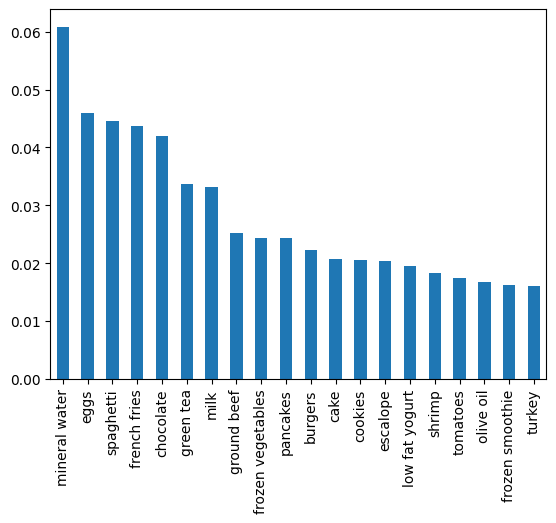

In [301]:
data.stack().value_counts(normalize=True)[:20].plot(kind='bar') # относительная частота


<AxesSubplot:>

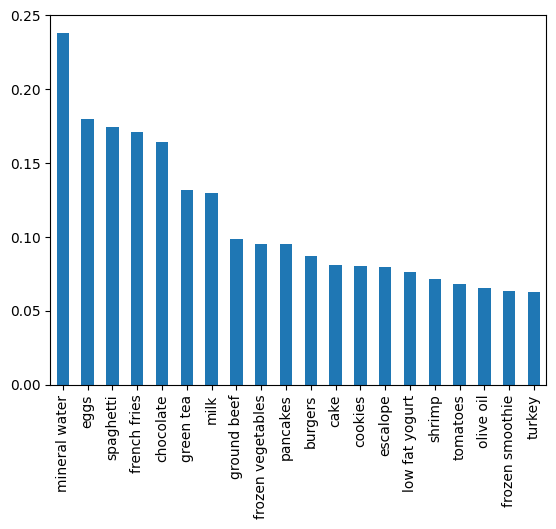

In [302]:
data.stack().value_counts().apply(lambda item: item / data.shape[0])[:20].plot(kind='bar') # фактическая частота

Применить алгоритм Apriori, используя 3 разные библиотеки (apriori_python, apyori, efficient_apriori).

In [303]:
'''
В большинстве библиотек, которые реализуют алгоритмы поиска ассоциативных правил в качестве входных значений необходимо подавать список транзакций, 
то есть список списков, поэтому нам необходимо преобразовать наш датасет в такой формат. 
При этом необходимо контролировать пустые значения в данных (NaN), их добавлять в список не надо.
'''
transactions = []
for i in range(0, data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

In [304]:
'''Также выведем первый элемент и первый список, и сравним с нашим датасетом, чтобы удостоверится, что преобразование прошло удачно'''
print(f'{transactions[0][0]}\n{transactions[0]}')

burgers
['burgers', 'meatballs', 'eggs']


In [305]:
# apriori_python
'''
minSup – это минимальная поддержка. 
Значение поддержки меняется от 0 (когда условие и следствие не встречаются вместе ни в одной транзакции) 
до 1 (когда условие и следствие во всех транзакциях появляются совместно). 

minConf – минимальная достоверность. 
Это показатель, характеризующий уверенность в том, что ассоциация A → B является ассоциативным правилом. 
То есть предположение о том, что появление события A влечёт за собой появление события B, является достаточно достоверным.
'''
t = []
start = time.perf_counter()

t1, rules = apriori(transactions, minSup=0.02, minConf= 0.3)
time1=(time.perf_counter()-start)
t.append(time1)
rules

[[{'tomatoes'}, {'spaghetti'}, 0.3060428849902534],
 [{'low fat yogurt'}, {'mineral water'}, 0.31239092495637],
 [{'frozen smoothie'}, {'mineral water'}, 0.31856540084388185],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'shrimp'}, {'mineral water'}, 0.32897196261682243],
 [{'burgers'}, {'eggs'}, 0.3302752293577982],
 [{'cake'}, {'mineral water'}, 0.33881578947368424],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'whole wheat rice'}, {'mineral water'}, 0.3439635535307517],
 [{'olive oil'}, {'spaghetti'}, 0.3488843813387424],
 [{'pancakes'}, {'mineral water'}, 0.3548387096774194],
 [{'tomatoes'}, {'mineral water'}, 0.3567251461988304],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'frozen vegetables'}, {'mineral water'}, 0.3748251748251748],
 [{'chicken'}, {'mineral water'}, 0.38],
 [{'cooking oil'}, {'mineral water'}, 0.39425587467362927],
 [{'ground beef'}, {'spaghetti'}, 0.3989145183175034],
 [{'ground beef'}, {'mineral water'}, 0.4165535956580

In [306]:
# apyori
'''
Здесь принимаются те же аргументы, что и в прошлой библиотеке, 
но необходимо указать минимальный лифт чуть больше 1, чтобы исключить вывод независимых правил
'''
start = time.perf_counter()
rules = apri(transactions=transactions,
             min_support=0.02,
             min_confidence=0.3,
             min_lift=1.0001)
results = list(rules)
time1 = (time.perf_counter() - start)
t.append(time1)
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print('Support: {0}; Confidence: {1}, Lift: {2};'.format(
            result[1], subset[2], subset[3]))
        print()

frozenset({'burgers'}) frozenset({'eggs'})
Support: 0.0288; Confidence: 0.3302752293577982, Lift: 1.837584733073803;

frozenset({'cake'}) frozenset({'mineral water'})
Support: 0.027466666666666667; Confidence: 0.33881578947368424, Lift: 1.422002474008188;

frozenset({'chicken'}) frozenset({'mineral water'})
Support: 0.0228; Confidence: 0.38, Lift: 1.594851706771125;

frozenset({'chocolate'}) frozenset({'mineral water'})
Support: 0.05266666666666667; Confidence: 0.32139951179820997, Lift: 1.3489067367020564;

frozenset({'cooking oil'}) frozenset({'mineral water'})
Support: 0.020133333333333333; Confidence: 0.3942558746736292, Lift: 1.6546833016520532;

frozenset({'frozen smoothie'}) frozenset({'mineral water'})
Support: 0.020133333333333333; Confidence: 0.3185654008438818, Lift: 1.3370120348791905;

frozenset({'frozen vegetables'}) frozenset({'mineral water'})
Support: 0.03573333333333333; Confidence: 0.3748251748251748, Lift: 1.5731330784492508;

frozenset({'ground beef'}) frozenset({'

In [307]:
# eff_apriori
start = time.perf_counter()

itemsets, rules = eff_apr(transactions, min_support=0.02, min_confidence=0.3)
time1 = (time.perf_counter() - start)
t.append(time1)
for i in range(0, len(rules)):
    print(rules[i])

{burgers} -> {eggs} (conf: 0.330, supp: 0.029, lift: 1.838, conv: 1.225)
{cake} -> {mineral water} (conf: 0.339, supp: 0.027, lift: 1.422, conv: 1.152)
{chicken} -> {mineral water} (conf: 0.380, supp: 0.023, lift: 1.595, conv: 1.229)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{cooking oil} -> {mineral water} (conf: 0.394, supp: 0.020, lift: 1.655, conv: 1.258)
{frozen smoothie} -> {mineral water} (conf: 0.319, supp: 0.020, lift: 1.337, conv: 1.118)
{frozen vegetables} -> {mineral water} (conf: 0.375, supp: 0.036, lift: 1.573, conv: 1.218)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{low fat yogurt} -> {mineral water} (conf: 0.312, supp: 0.024, lift: 1.311, conv: 1.108)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{olive oil} -> {mineral water} (conf: 0.418, supp: 0.027, lift: 1.754, conv: 1

In [308]:
# fpgrowth_py
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.02, minConf=0.3)
time1 = (time.perf_counter() - start)
t.append(time1)
for i in range(0, len(rules)):
    print(rules[i])

[{'soup'}, {'mineral water'}, 0.45646437994722955]
[{'cooking oil'}, {'mineral water'}, 0.39425587467362927]
[{'whole wheat rice'}, {'mineral water'}, 0.3439635535307517]
[{'chicken'}, {'mineral water'}, 0.38]
[{'frozen smoothie'}, {'mineral water'}, 0.31856540084388185]
[{'olive oil'}, {'spaghetti'}, 0.3488843813387424]
[{'olive oil'}, {'mineral water'}, 0.4178498985801217]
[{'tomatoes'}, {'spaghetti'}, 0.3060428849902534]
[{'tomatoes'}, {'mineral water'}, 0.3567251461988304]
[{'shrimp'}, {'mineral water'}, 0.32897196261682243]
[{'low fat yogurt'}, {'mineral water'}, 0.31239092495637]
[{'cake'}, {'mineral water'}, 0.33881578947368424]
[{'burgers'}, {'eggs'}, 0.3302752293577982]
[{'pancakes'}, {'mineral water'}, 0.3548387096774194]
[{'frozen vegetables'}, {'mineral water'}, 0.3748251748251748]
[{'ground beef'}, {'spaghetti'}, 0.3989145183175034]
[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'chocolate'}, {'mineral water'}

Сравнить время выполнения всех алгоритмов и построить гистограмму.

Время выполнения apriori:  3.169203800003743 

Время выполнения apriori 2:  0.03099939998355694 

Время выполнения efficient_apriori:  0.036479400005191565 

Время выполнения fpgrowth:  0.6796633999911137 



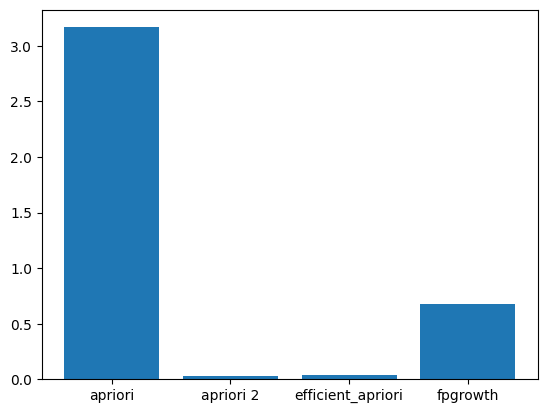

In [309]:
print('Время выполнения apriori: ', t[0], '\n')
print('Время выполнения apriori 2: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth'], t)
plt.show()

Загрузить данные data.csv.

In [310]:
data = pd.read_csv('data.csv')
data

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9525,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9526,Truffles,Tea,Spanish Brunch,Christmas common,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9527,Muffin,Tacos/Fajita,Coffee,Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9528,Coffee,Pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров). 


In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bread        9207 non-null   object
 1   Unnamed: 1   5840 non-null   object
 2   Unnamed: 2   2959 non-null   object
 3   Unnamed: 3   1505 non-null   object
 4   Unnamed: 4   596 non-null    object
 5   Unnamed: 5   245 non-null    object
 6   Unnamed: 6   91 non-null     object
 7   Unnamed: 7   36 non-null     object
 8   Unnamed: 8   13 non-null     object
 9   Unnamed: 9   9 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 893.6+ KB


<AxesSubplot:>

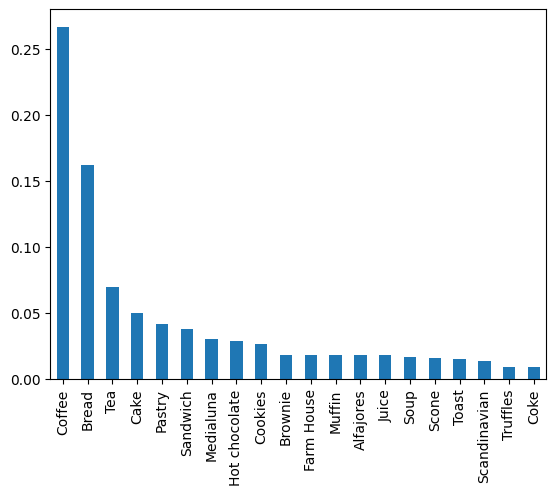

In [312]:
data.stack().value_counts(normalize=True)[:20].plot(kind='bar') # относительная частота



<AxesSubplot:>

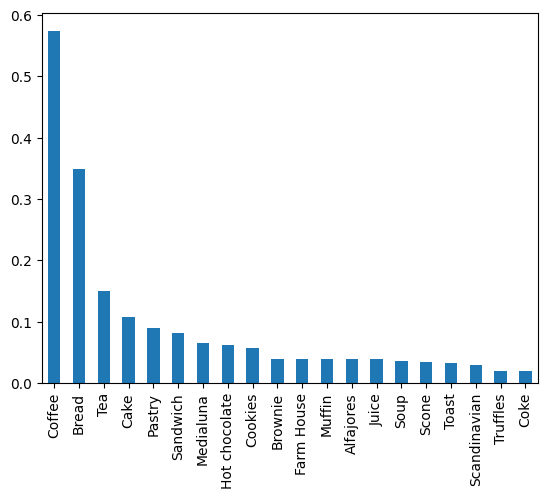

In [313]:
data.stack().value_counts().apply(lambda item: item / data.shape[0])[:20].plot(kind='bar') # фактическая частота

Применить алгоритм Apriori, используя 3 разные библиотеки (apriori_python, apyori, efficient_apriori).

In [314]:
'''
В большинстве библиотек, которые реализуют алгоритмы поиска ассоциативных правил в качестве входных значений необходимо подавать список транзакций, 
то есть список списков, поэтому нам необходимо преобразовать наш датасет в такой формат. 
При этом необходимо контролировать пустые значения в данных (NaN), их добавлять в список не надо.
'''
transactions = []
for i in range(0, data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

In [315]:
'''Также выведем первый элемент и первый список, и сравним с нашим датасетом, чтобы удостоверится, что преобразование прошло удачно'''
print(f'{transactions[0][0]}\n{transactions[0]}')

Scandinavian
['Scandinavian', 'Scandinavian']


In [323]:
# apriori_python
'''
minSup – это минимальная поддержка. 
Значение поддержки меняется от 0 (когда условие и следствие не встречаются вместе ни в одной транзакции) 
до 1 (когда условие и следствие во всех транзакциях появляются совместно). 

minConf – минимальная достоверность. 
Это показатель, характеризующий уверенность в том, что ассоциация A → B является ассоциативным правилом. 
То есть предположение о том, что появление события A влечёт за собой появление события B, является достаточно достоверным.
'''
t = []
start = time.perf_counter()

t1, rules = apriori(transactions, minSup=0.02, minConf=0.3)
time1 = (time.perf_counter() - start)
t.append(time1)
rules


[[{'Pastry'}, {'Bread'}, 0.33865030674846625],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942],
 [{'Cookies'}, {'Coffee'}, 0.5184466019417475],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Juice'}, {'Coffee'}, 0.5342465753424658],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037],
 [{'Medialuna'}, {'Coffee'}, 0.5692307692307692],
 [{'Toast'}, {'Coffee'}, 0.7044025157232704]]

In [317]:
# apyori
'''
Здесь принимаются те же аргументы, что и в прошлой библиотеке, 
но необходимо указать минимальный лифт чуть больше 1, чтобы исключить вывод независимых правил
'''

start = time.perf_counter()
rules = apri(transactions=transactions,
             min_support=0.02,
             min_confidence=0.3,
             min_lift=1.0001)
results = list(rules)
time1 = (time.perf_counter() - start)
t.append(time1)
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print('Support: {0}; Confidence: {1}, Lift: {2};'.format(
            result[1], subset[2], subset[3]))
        print()

frozenset({'Pastry'}) frozenset({'Bread'})
Support: 0.028961175236096537; Confidence: 0.33865030674846625, Lift: 1.0424216483568745;

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.05435466946484785; Confidence: 0.5269582909460834, Lift: 1.109079618532724;

frozenset({'Cookies'}) frozenset({'Coffee'})
Support: 0.02801678908709339; Confidence: 0.5184466019417475, Lift: 1.0911652200761603;

frozenset({'Hot chocolate'}) frozenset({'Coffee'})
Support: 0.02938090241343127; Confidence: 0.5072463768115942, Lift: 1.0675923080862397;

frozenset({'Juice'}) frozenset({'Coffee'})
Support: 0.020461699895068207; Confidence: 0.5342465753424658, Lift: 1.124419139358149;

frozenset({'Medialuna'}) frozenset({'Coffee'})
Support: 0.034942287513116475; Confidence: 0.5692307692307693, Lift: 1.1980497417776572;

frozenset({'Pastry'}) frozenset({'Coffee'})
Support: 0.0472193074501574; Confidence: 0.5521472392638037, Lift: 1.162094344121919;

frozenset({'Sandwich'}) frozenset({'Coffee'})
Support: 0.03798

In [318]:
# eff_apriori
start = time.perf_counter()

itemsets, rules = eff_apr(transactions, min_support=0.02, min_confidence=0.3)
time1 = (time.perf_counter() - start)
t.append(time1)
for i in range(0, len(rules)):
    print(rules[i])

{Pastry} -> {Bread} (conf: 0.339, supp: 0.029, lift: 1.042, conv: 1.021)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Cookies} -> {Coffee} (conf: 0.518, supp: 0.028, lift: 1.091, conv: 1.090)
{Hot chocolate} -> {Coffee} (conf: 0.507, supp: 0.029, lift: 1.068, conv: 1.065)
{Juice} -> {Coffee} (conf: 0.534, supp: 0.020, lift: 1.124, conv: 1.127)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.218)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)
{Toast} -> {Coffee} (conf: 0.704, supp: 0.024, lift: 1.483, conv: 1.776)


In [319]:
# fpgrowth_py
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.02, minConf=0.3)
time1 = (time.perf_counter() - start)
t.append(time1)
for i in range(0, len(rules)):
    print(rules[i])

[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Scone'}, {'Coffee'}, 0.5229357798165137]
[{'Soup'}, {'Coffee'}, 0.4601226993865031]
[{'Juice'}, {'Coffee'}, 0.5342465753424658]
[{'Alfajores'}, {'Coffee'}, 0.5406976744186046]
[{'Muffin'}, {'Coffee'}, 0.489010989010989]
[{'Brownie'}, {'Coffee'}, 0.49076517150395776]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Bread'}, 0.33865030674846625]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]


Сравнить время выполнения всех алгоритмов и построить гистограмму.

Время выполнения apriori:  0.48144699999829754 

Время выполнения apriori 2:  0.008974900003522635 

Время выполнения efficient_apriori:  0.007469800009857863 

Время выполнения fpgrowth:  0.2410098999971524 



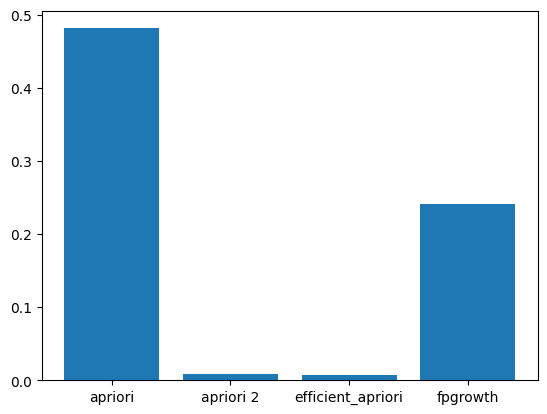

In [320]:
print('Время выполнения apriori: ', t[0], '\n')
print('Время выполнения apriori 2: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth'], t)
plt.show()